# Preprocessing the Takei mESC data at 1Mb resolution
1) Read the FOF-CT CSV data of the two replicates into the alabtools chromatin tracing (CT) file.
2) Merge the two replicates into a single file.
3) Derive volumetric data from the tracing (volumes of the cell nucleus) creating an alabtools file CTENV (chromatin tracing envelope).
4) Clean up the data by removing cells with weird volumes.
5) Phase the CtFile (maternal and paternal alleles).

In [12]:
import os
import numpy as np
import copy
from matplotlib import pyplot as plt
from alabtools.imaging import CtFile, CtEnvelope

In [2]:
%matplotlib inline

## PART 1: Read the FOF-CT CSV data into CT files

In [2]:
# Initialize the CtFile objects
ct1 = CtFile('takei_1Mb_rep1.ct', 'w')
ct2 = CtFile('takei_1Mb_rep2.ct', 'w')

In [3]:
# Read the FOF-CT files
ct1.set_from_fofct('takei_mesc_DNA-tracing_1Mb_rep1.csv')
ct2.set_from_fofct('takei_mesc_DNA-tracing_1Mb_rep2.csv')

Assembly mm10 found in alabtools/genomes. Using this.


chroms or lengths not given, reading from genomes info file.


Assembly mm10 found in alabtools/genomes. Using this.


chroms or lengths not given, reading from genomes info file.


In [5]:
# Print the attributes of the CtFile objects
print('ct1:')
print('ncell =', ct1.ncell)
print('ndomain =', ct1.ndomain)
print('nspot_tot =', ct1.nspot_tot)
print('ntrace_tot =', ct1.ntrace_tot)
print('nspot_max =', ct1.nspot_max)
print('ncopy_max =', ct1.ncopy_max)
print('cell_labels.shape =', ct1.cell_labels.shape)
print('ncopy.shape =', ct1.ncopy.shape)
print('nspot.shape =', ct1.nspot.shape)
print('coordinates.shape =', ct1.coordinates.shape)
print('coordinates[0, 0, 0, 0, 0] =', ct1.coordinates[0, 0, 0, 0, 0])

print('\n')

print('ct2:')
print('ncell =', ct2.ncell)
print('ndomain =', ct2.ndomain)
print('nspot_tot =', ct2.nspot_tot)
print('ntrace_tot =', ct2.ntrace_tot)
print('nspot_max =', ct2.nspot_max)
print('ncopy_max =', ct2.ncopy_max)
print('cell_labels.shape =', ct2.cell_labels.shape)
print('ncopy.shape =', ct2.ncopy.shape)
print('nspot.shape =', ct2.nspot.shape)
print('coordinates.shape =', ct2.coordinates.shape)
print('coordinates[0, 0, 0, 0, 0] =', ct2.coordinates[0, 0, 0, 0, 0])

ct1:
ncell = 201
ndomain = 2460
nspot_tot = 705143
ntrace_tot = 4019
nspot_max = 10
ncopy_max = 1
cell_labels.shape = (201,)
ncopy.shape = (201, 2460)
nspot.shape = (201, 2460, 1)
coordinates.shape = (201, 2460, 1, 10, 3)
coordinates[0, 0, 0, 0, 0] = 174.119


ct2:
ncell = 245
ndomain = 2460
nspot_tot = 1090085
ntrace_tot = 4900
nspot_max = 15
ncopy_max = 1
cell_labels.shape = (245,)
ncopy.shape = (245, 2460)
nspot.shape = (245, 2460, 1)
coordinates.shape = (245, 2460, 1, 15, 3)
coordinates[0, 0, 0, 0, 0] = 158.7


In [6]:
# Close the CtFile objects
ct1.close()
ct2.close()

## PART 2: Merge the two replicates into a single file

In [7]:
# Load the CtFile objects
ct1 = CtFile('takei_1Mb_rep1.ct', 'r')
ct2 = CtFile('takei_1Mb_rep2.ct', 'r')

In [8]:
# Merge the CtFile objects
ct = ct1.merge(ct2, 'takei_1Mb_comb.ct', tag1='_rep1', tag2='_rep2')

In [9]:
# Print attributes of the merged CtFile object
print('ct:')
print('ncell =', ct.ncell)
print('ndomain =', ct.ndomain)
print('nspot_tot =', ct.nspot_tot)
print('ntrace_tot =', ct.ntrace_tot)
print('nspot_max =', ct.nspot_max)
print('ncopy_max =', ct.ncopy_max)
print('cell_labels.shape =', ct.cell_labels.shape)
print('ncopy.shape =', ct.ncopy.shape)
print('nspot.shape =', ct.nspot.shape)
print('coordinates.shape =', ct.coordinates.shape)
print('coordinates[0, 0, 0, 0, 0] =', ct.coordinates[0, 0, 0, 0, 0])

ct:
ncell = 446
ndomain = 2460
nspot_tot = 1795228
ntrace_tot = 8919
nspot_max = 15
ncopy_max = 1
cell_labels.shape = (446,)
ncopy.shape = (446, 2460)
nspot.shape = (446, 2460, 1)
coordinates.shape = (446, 2460, 1, 15, 3)
coordinates[0, 0, 0, 0, 0] = 174.119


In [10]:
# Print the cell labels of ct1, ct2, and ct
print('ct1:')
print(ct1.cell_labels)

print('\n')

print('ct2:')
print(ct2.cell_labels)

print('\n')

print('ct:')
print(ct.cell_labels)

ct1:
['0_1' '0_10' '0_11' '0_12' '0_13' '0_14' '0_15' '0_16' '0_17' '0_18'
 '0_19' '0_2' '0_20' '0_21' '0_22' '0_23' '0_24' '0_25' '0_26' '0_27'
 '0_28' '0_29' '0_3' '0_30' '0_31' '0_32' '0_33' '0_34' '0_35' '0_36'
 '0_37' '0_38' '0_39' '0_4' '0_40' '0_41' '0_42' '0_43' '0_44' '0_45'
 '0_46' '0_5' '0_6' '0_7' '0_8' '0_9' '1_1' '1_10' '1_11' '1_12' '1_13'
 '1_14' '1_15' '1_16' '1_17' '1_18' '1_19' '1_2' '1_20' '1_21' '1_22'
 '1_23' '1_24' '1_25' '1_26' '1_27' '1_28' '1_29' '1_3' '1_30' '1_31'
 '1_32' '1_33' '1_34' '1_35' '1_36' '1_37' '1_4' '1_5' '1_6' '1_7' '1_8'
 '1_9' '2_1' '2_10' '2_11' '2_12' '2_13' '2_14' '2_15' '2_16' '2_17'
 '2_18' '2_19' '2_2' '2_20' '2_21' '2_22' '2_23' '2_24' '2_25' '2_26'
 '2_27' '2_28' '2_29' '2_3' '2_30' '2_31' '2_32' '2_33' '2_34' '2_35'
 '2_36' '2_37' '2_38' '2_39' '2_4' '2_40' '2_41' '2_42' '2_43' '2_44'
 '2_45' '2_46' '2_5' '2_6' '2_7' '2_8' '2_9' '3_1' '3_10' '3_11' '3_12'
 '3_13' '3_14' '3_15' '3_16' '3_17' '3_18' '3_19' '3_2' '3_20' '3_21'
 '3_22' '

In [11]:
# Close the CtFile objects
ct1.close()
ct2.close()
ct.close()

## PART 3: Derive volumetric data from the tracing

Performed in a separate python file because we need to parallelize it.

## PART 4: Clean up the data by removing cells with weird volumes

In [3]:
# Read the CtFile and CtEnvelope objects
ct = CtFile('takei_1Mb_comb.ct', 'r')
ctenv = CtEnvelope('takei_1Mb_comb.ctenv', 'r')

In [4]:
# Read the number of spots per cell and the volume of each cell
nspot_per_cell = ct.nspot.sum(axis=1).ravel()
volume_per_cell = ctenv.volume
assert len(nspot_per_cell) == len(volume_per_cell) == ct.ncell
assert nspot_per_cell.shape == volume_per_cell.shape

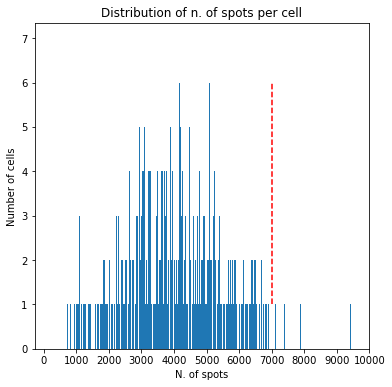

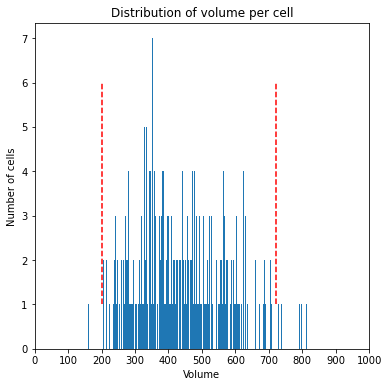

In [5]:
# Plot the distribution of number of spots per cell and the volume of each cell
plt.figure(figsize=(6, 6))
plt.hist(nspot_per_cell, bins=len(nspot_per_cell))
plt.plot(7000 * np.ones(2), [1, 6], color='red', linestyle='--')
plt.xticks(np.arange(0, 11000, 1000))
plt.title('Distribution of n. of spots per cell')
plt.xlabel('N. of spots')
plt.ylabel('Number of cells')
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(volume_per_cell, bins=len(volume_per_cell))
plt.plot(200 * np.ones(2), [1, 6], color='red', linestyle='--')
plt.plot(720 * np.ones(2), [1, 6], color='red', linestyle='--')
plt.xticks(np.arange(0, 1100, 100))
plt.title('Distribution of volume per cell')
plt.xlabel('Volume')
plt.ylabel('Number of cells')
plt.show()


There are some potential outliers in the data:
1) Cells with total n. of spot > 7000 seem to be outliers.
2) Cells with volume < 200 um^3 and volume > 700 um^3 seem to be outliers.

To measure if removing the outliers is good, we can use the Kuncheva index, which is a measure of ordering within two sets of data. The higher the index, the more similar the ordering of the two sets of data.

In our data, I expect this behaviour:
1) for cells in G1, the volume increases but the number of spots stays constant, so there shouldn't be a correlation;
2) for cells in S, both the volume and the number of spots increase, so there should be a correlation;
3) for cells in G2, the volume increases but the number of spots stays constant, so there shouldn't be a correlation.
So the Kuncheva index should be high for S and low for G1 and G2: if the cells are ordered from low to high volume, the K-index should start low, increase in the middle and then decrease again.

In [6]:
# Define the Kuncheva function
def kuncheva(a, b):
    """Computes the Kuncheva index between two lists of integers.
    
    The index is computed as function of the cardinality (k),
    i.e. the number of elements in the lists.
    
    The formula is:
        KI(k) = (|A intersect B| - k^2 / |A|) / (k - k^2 / |A|)
    (https://www.researchgate.net/publication/221173759_A_stability_index_for_feature_selection)

    Args:
        a (list or np.array): First list of integers.
        b (list or np.array): Second list of integers.

    Returns:
        kun_list (list): List of Kuncheva indices for each cardinality.
    """
    if len(a) != len(b):
        raise Exception('Length of a and b does not match!')
    kun_list = list()
    for k in range(1, len(a) - 1):
        ind = (len(np.intersect1d(a[:k], b[:k])) - k ** 2 / len(a)) / (k - k ** 2 / len(a))
        kun_list.append(ind)
    return kun_list

In [7]:
# Get the ordering of the cells by number of spots and volume from lowest to highest
order_nspot = np.argsort(nspot_per_cell)
order_volume = np.argsort(volume_per_cell)

for i in range(ct.ncell - 1):
    assert nspot_per_cell[order_nspot[i]] <= nspot_per_cell[order_nspot[i + 1]]
    assert volume_per_cell[order_volume[i]] <= volume_per_cell[order_volume[i + 1]]

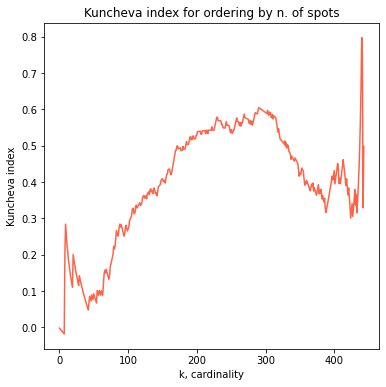

In [8]:
# Plot the Kuncheva index for the ordering by number of spots
plt.figure(figsize=(6, 6))
plt.plot(kuncheva(order_nspot, order_volume), color='tomato')
plt.title('Kuncheva index for ordering by n. of spots')
plt.xlabel('k, cardinality')
plt.ylabel('Kuncheva index')
plt.show()

In this plot, the cardinality k can be somewhat associated with the volume (remember that the cells in the k analysis are sorted first by volume and spots).

The plot agrees only partially with my expectations: although it's true that overall the trend is increasing first (potentially from G1 to S) and then decreasing (potentially from S to G2), there are two strong peaks at low and high cardinality that are hard to explain.

It is possible that - by removing the cells I identified as potential outliers - these peaks will disappear.

In [9]:
# Now let's try to remove the potential outliers
mask_nspot = nspot_per_cell > 7000
mask_volume = np.logical_or(volume_per_cell < 200, volume_per_cell > 720)
mask = np.logical_or(mask_nspot, mask_volume)

# Check properties of the outliers
print('Number of outliers in nspot:', mask_nspot.sum())
print('Number of outliers in volume:', mask_volume.sum())
print('Number of outliers in both:', np.logical_and(mask_nspot, mask_volume).sum())
print('Number of outliers in either:', np.logical_or(mask_nspot, mask_volume).sum())

# Get the cell numbers of the outliers
outliers = np.where(mask)[0]
print('Cell numbers of outliers:')
print(outliers)

# Save the outliers in a numpy array
np.save('outliers.npy', outliers)

# Remove the outliers from nspot_per_cell and volume_per_cell
nspot_per_cell = nspot_per_cell[~mask]
volume_per_cell = volume_per_cell[~mask]

Number of outliers in nspot: 7
Number of outliers in volume: 10
Number of outliers in both: 4
Number of outliers in either: 13
Cell numbers of outliers:
[ 38  73 135 153 212 239 258 262 328 340 342 406 418]


In [10]:
# Get the ordering of the cells by number of spots and volume from lowest to highest
order_nspot = np.argsort(nspot_per_cell)
order_volume = np.argsort(volume_per_cell)

for i in range(len(nspot_per_cell) - 1):
    assert nspot_per_cell[order_nspot[i]] <= nspot_per_cell[order_nspot[i + 1]]
    assert volume_per_cell[order_volume[i]] <= volume_per_cell[order_volume[i + 1]]

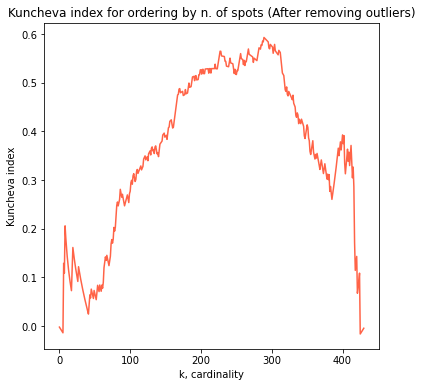

In [11]:
# Plot the Kuncheva index for the ordering by number of spots
plt.figure(figsize=(6, 6))
plt.plot(kuncheva(order_nspot, order_volume), color='tomato')
plt.title('Kuncheva index for ordering by n. of spots (After removing outliers)')
plt.xlabel('k, cardinality')
plt.ylabel('Kuncheva index')
plt.show()

The trend now is much more clear, and it is in agreement with my expectations: the K-index increases and then decreases, supporting the intuition of the G1-S-G2 ordering.

I am going to continue the analysis by removing these outliers.

In [13]:
# Close the CtFile
ct.close()
# Duplicate the CtFile file using os and rename it
os.system('cp takei_1Mb_comb.ct takei_1Mb_comb_no-out.ct')
# Read the CtFile in write mode
ct = CtFile('takei_1Mb_comb_no-out.ct', 'r+')

In [15]:
# Change the ctenv file names
ctenv.filename = 'takei_1Mb_comb_no-out.ctenv'
ctenv.ct_fit = ctenv.ct_fit.replace('takei_1Mb_comb.ct',
                                    'takei_1Mb_comb_no-out.ct')

In [17]:
# Remove the outliers from the CtFile
outliers = np.load('outliers.npy')
ct.pop_cells(outliers)
ctenv.pop_cells(outliers)

In [18]:
# Trim the CtFile
ct.trim()

Trimming spot 14...
Trimming spot 13...


In [19]:
# Print the attributes of the CtFile and CtEnvelope
print('ct:')
print('ncell =', ct.ncell)
print('ndomain =', ct.ndomain)
print('nspot_tot =', ct.nspot_tot)
print('ntrace_tot =', ct.ntrace_tot)
print('nspot_max =', ct.nspot_max)
print('ncopy_max =', ct.ncopy_max)
print('cell_labels.shape =', ct.cell_labels.shape)
print('ncopy.shape =', ct.ncopy.shape)
print('nspot.shape =', ct.nspot.shape)
print('coordinates.shape =', ct.coordinates.shape)
print('coordinates[0, 0, 0, 0, 0] =', ct.coordinates[0, 0, 0, 0, 0])

print('\n')

print('ctenv:')
print('ncell =', ctenv.ncell)
print('fitted =', ctenv.fitted)
print('ct_fit =', ctenv.ct_fit)
print('cell_labels.shape =', ctenv.cell_labels.shape)
print('alpha.shape =', ctenv.alpha.shape)
print('len(mesh) =', len(ctenv.mesh))
print('volume.shape =', ctenv.volume.shape)
print('volume[0] =', ctenv.volume[0])

ct:
ncell = 433
ndomain = 2460
nspot_tot = 1715341.0
ntrace_tot = 8659
nspot_max = 13
ncopy_max = 1
cell_labels.shape = (433,)
ncopy.shape = (433, 2460)
nspot.shape = (433, 2460, 1)
coordinates.shape = (433, 2460, 1, 13, 3)
coordinates[0, 0, 0, 0, 0] = 174.119


ctenv:
ncell = 433
fitted = True
ct_fit = /u/home/f/fmusella/imaging/preprocessing/takei_1Mb_comb_no-out.ct
cell_labels.shape = (433,)
alpha.shape = (433,)
len(mesh) = 433
volume.shape = (433,)
volume[0] = 517.1031555401664


In [20]:
# Close the CtFile and save the CtEnvelope
ct.close()
ctenv.save()

## PART 5: Phase the CtFile (maternal and paternal alleles)

Performed in a separate python file because we need to parallelize it.

## End of preprocessing
The files:
- takei_1Mb_comb_no-out_phased.ct
- takei_1Mb_comb_no-out.ctenv

are the final files that will be used for the analysis.

I am going to rename them to:

- takei_1Mb_final.ct
- takei_1Mb_final.ctenv

In [21]:
os.system('cp takei_1Mb_comb_no-out_phased.ct takei_1Mb_final.ct')
ctenv.filename = 'takei_1Mb_final.ctenv'
ctenv.ct_fit = ctenv.ct_fit.replace('takei_1Mb_comb_no-out.ct',
                                    'takei_1Mb_final.ct')
ctenv.save()